# Credit Card Lead Prediction

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings.



The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. 



In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.



Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:

Customer details (gender, age, region etc.)
Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

# Importing Libraries 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
train = pd.read_csv('train_s3TEQDk.csv')
test  = pd.read_csv('test_mSzZ8RL.csv')

# EDA

In [3]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
test.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,No,737178,Yes
105311,F2NOYPPZ,Male,27,RG256,Salaried,X1,21,No,591565,No


0    187437
1     58288
Name: Is_Lead, dtype: int64


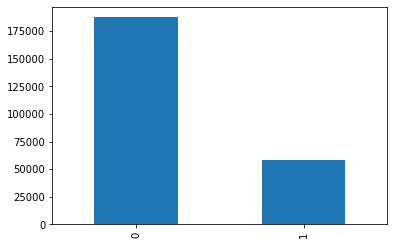

In [5]:
print(train.Is_Lead.value_counts())
train.Is_Lead.value_counts().plot(kind='bar');

# From the bar chart we are seeing only 23.72 % of total population are interested and rest are not interested for the Credit Card.



# Data Cleaning

In [6]:
train_test_data = [train,test]
#missing values
for dataset in train_test_data:
    print(dataset.isnull().sum())

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64
ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64


# "Credit_Product" missing value treatment

In [7]:
for dataset in train_test_data:
    dataset['Credit_Product'].fillna(dataset['Credit_Product'].mode()[0],inplace=True)

# Avg_Account_Balance

In [8]:
#Let's find out the min and max value
print(f"train max value of avg_account_balance :{train['Avg_Account_Balance'].max()}")
print(f"train min value of avg_account_balance :{train['Avg_Account_Balance'].min()}")
print("\n")
print(f"test max value of avg_account_balance :{test['Avg_Account_Balance'].max()}")
print(f"test min value of avg_account_balance :{test['Avg_Account_Balance'].min()}")

train max value of avg_account_balance :10352009
train min value of avg_account_balance :20790


test max value of avg_account_balance :9908858
test min value of avg_account_balance :22597


In [9]:
#Avg_Account_Balance <= 1000000  == lower income grp
#Avg_Account_Balance > 1000000  and <= 2000000 == higher income grp
#Avg_Account_Balance > 1000000  and <= 2000000 == more higher income grp
#Avg_Account_Balance > 3000000  == rich income grp
train.loc[train['Avg_Account_Balance'] <= 800000,'Avg_Account_Balance']                                               = 0
train.loc[(train['Avg_Account_Balance'] > 800000) & (train['Avg_Account_Balance'] <= 1500000),'Avg_Account_Balance']  = 1
train.loc[(train['Avg_Account_Balance'] > 1500000) & (train['Avg_Account_Balance'] <= 2500000),'Avg_Account_Balance']  = 2
train.loc[train['Avg_Account_Balance'] > 2500000,'Avg_Account_Balance']                                                = 3

In [10]:
test.loc[test['Avg_Account_Balance'] <= 800000,'Avg_Account_Balance']                                               = 0
test.loc[(test['Avg_Account_Balance'] > 800000) & (test['Avg_Account_Balance'] <= 1500000),'Avg_Account_Balance']   = 1
test.loc[(test['Avg_Account_Balance'] > 1500000) & (test['Avg_Account_Balance'] <= 2500000),'Avg_Account_Balance']   = 2
test.loc[test['Avg_Account_Balance'] > 2500000,'Avg_Account_Balance']                                                = 3

In [11]:
train['Avg_Account_Balance'].value_counts()

0    104622
1     90154
2     36207
3     14742
Name: Avg_Account_Balance, dtype: int64

In [12]:
test['Avg_Account_Balance'].value_counts()

0    44855
1    38420
2    15665
3     6372
Name: Avg_Account_Balance, dtype: int64

# Gender

In [13]:
gender_map = {'Male':0,'Female':1}
for dataset in train_test_data:
    dataset.Gender = dataset.Gender.map(gender_map)

# Age

In [14]:
#Let's find out the min and max value of Age
print(f"train max value of Age :{train['Age'].max()}")
print(f"train min value of Age :{train['Age'].min()}")
print("\n")
print(f"test max value of Age :{test['Age'].max()}")
print(f"test min value of Age :{test['Age'].min()}")

train max value of Age :85
train min value of Age :23


test max value of Age :85
test min value of Age :24


# Age Binning

In [15]:
#Age <= 30  == young
#Age > 30  and <= 40 == mid age
#Age > 40  and <= 60 == higher mid age
#Age > 60  == old age grp
train.loc[train['Age'] <= 30,'Age']                          = 0
train.loc[(train['Age'] > 30) & (train['Age'] <= 40),'Age']  = 1
train.loc[(train['Age'] > 40) & (train['Age'] <= 60),'Age']  = 2
train.loc[train['Age'] > 60,'Age']                           = 3

In [16]:
test.loc[test['Age'] <= 30,'Age']                          = 0
test.loc[(test['Age'] > 30) & (test['Age'] <= 40),'Age']   = 1
test.loc[(test['Age'] > 40) & (test['Age'] <= 60),'Age']   = 2
test.loc[test['Age'] > 60,'Age']                           = 3

In [17]:
train.Age.value_counts()

2    98258
0    68140
1    44729
3    34598
Name: Age, dtype: int64

In [18]:
test.Age.value_counts()

2    42111
0    29236
1    19049
3    14916
Name: Age, dtype: int64

# Vintage

In [19]:
#Let's find out the min and max value of Vintage
print(f"train max value of Vintage :{train['Vintage'].max()}")
print(f"train min value of Vintage :{train['Vintage'].min()}")
print("\n")
print(f"test max value of Vintage :{test['Vintage'].max()}")
print(f"test min value of Vintage :{test['Vintage'].min()}")

train max value of Vintage :135
train min value of Vintage :7


test max value of Vintage :135
test min value of Vintage :7


# Vintage Binning

In [20]:
#Vintage <= 25  == low
#Vintage > 25  and <= 50 == medium
#Vintage > 50  and <= 100 == high
#Vintage > 100  == higher
train.loc[train['Vintage'] <= 25,'Vintage']                               = 0
train.loc[(train['Vintage'] > 25) & (train['Vintage'] <= 50),'Vintage']   = 1
train.loc[(train['Vintage'] > 50) & (train['Vintage'] <= 100),'Vintage']  = 2
train.loc[train['Vintage'] > 100,'Vintage']                               = 3

In [21]:
test.loc[test['Vintage'] <= 25,'Vintage']                               = 0
test.loc[(test['Vintage'] > 25) & (test['Vintage'] <= 50),'Vintage']    = 1
test.loc[(test['Vintage'] > 50) & (test['Vintage'] <= 100),'Vintage']   = 2
test.loc[test['Vintage'] > 100,'Vintage']                               = 3

In [22]:
train.Vintage.value_counts()

0    86104
2    72324
1    67589
3    19708
Name: Vintage, dtype: int64

# Occupation

In [23]:
for dataset in train_test_data:
    print(dataset['Occupation'].value_counts())

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64
Self_Employed    43192
Salaried         30913
Other            30131
Entrepreneur      1076
Name: Occupation, dtype: int64


# One Hot encoding Occupation

In [24]:
Occupation_dummies_train = pd.get_dummies(train.Occupation, prefix='Occupation',drop_first=True)
train = pd.concat([train,Occupation_dummies_train],axis=1)
train.drop(['Occupation'],axis=1,inplace=True)
Occupation_dummies_test = pd.get_dummies(test.Occupation, prefix='Occupation',drop_first=True)
test = pd.concat([test,Occupation_dummies_test],axis=1)
test.drop(['Occupation'],axis=1,inplace=True)

In [25]:
#Occupation Map
# occupation_map = {'Self_Employed':0,'Salaried':1,'Entrepreneur':2,'Other':3}
# for dataset in train_test_data:
#     dataset.Occupation = dataset.Occupation.map(occupation_map)

# Channel_Code

In [26]:
for dataset in train_test_data:
    print(dataset['Channel_Code'].value_counts())

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64
X1    44484
X3    29269
X2    29176
X4     2383
Name: Channel_Code, dtype: int64


# One hot encoding Channel_Code

In [27]:
channel_code_dummies_train = pd.get_dummies(train.Channel_Code, prefix='Channel_code',drop_first=True)
train = pd.concat([train,channel_code_dummies_train],axis=1)
train.drop(['Channel_Code'],axis=1,inplace=True)
channel_code_dummies_test = pd.get_dummies(test.Channel_Code, prefix='Channel_code',drop_first=True)
test = pd.concat([test,channel_code_dummies_test],axis=1)
test.drop(['Channel_Code'],axis=1,inplace=True)

In [28]:
#Channel_Code Map
# Channel_Code_map = {'X1':0,'X2':1,'X3':2,'X4':3}
# for dataset in train_test_data:
#     dataset.Channel_Code = dataset.Channel_Code.map(Channel_Code_map)

In [29]:
train_test_data = [train,test]

# Credit_Product

In [30]:
for dataset in train_test_data:
    print(dataset['Credit_Product'].value_counts())

No     173682
Yes     72043
Name: Credit_Product, dtype: int64
No     74130
Yes    31182
Name: Credit_Product, dtype: int64


In [31]:
#Credit_Product Map
Credit_Product_map = {'No':0,'Yes':1}
for dataset in train_test_data:
    dataset.Credit_Product = dataset.Credit_Product.map(Credit_Product_map)

# Is_Active

In [32]:
for dataset in train_test_data:
    print(dataset['Is_Active'].value_counts())

No     150290
Yes     95435
Name: Is_Active, dtype: int64
No     63797
Yes    41515
Name: Is_Active, dtype: int64


In [33]:
#Is_Active Map
Is_Active_map = {'No':0,'Yes':1}
for dataset in train_test_data:
    dataset.Is_Active = dataset.Is_Active.map(Is_Active_map)

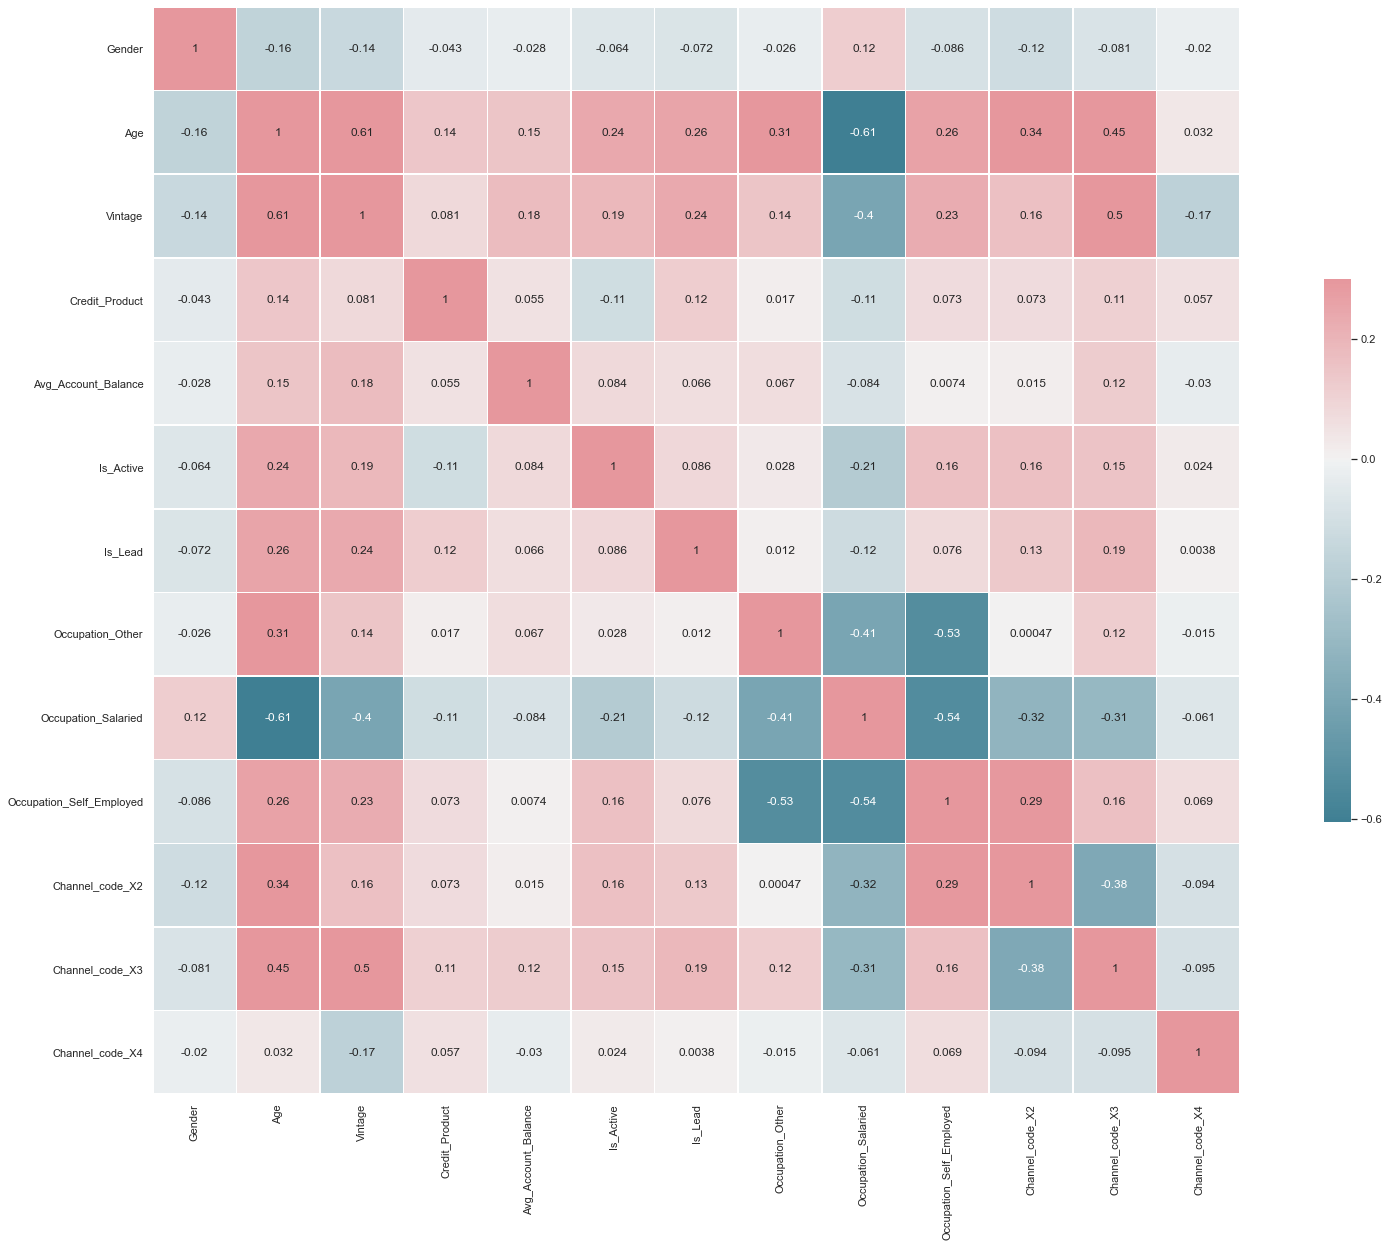

In [34]:
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

# As we see "Vintage" , "Channel_code" are more related with "Age" , we can drop one of them, so let's drop channel_code

# Region_Code doesn't influence model output so can be deleted

In [35]:
# for dataset in train_test_data:
#     print(dataset['Region_Code'].value_counts())

In [36]:
train.head()

,ID,Gender,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_code_X2,Channel_code_X3,Channel_code_X4
0,NNVBBKZB,1,3,RG268,1,0,1,0,0,1,0,0,0,1,0
1,IDD62UNG,1,0,RG277,1,0,0,0,0,0,1,0,0,0,0
2,HD3DSEMC,1,2,RG268,1,0,1,1,0,0,0,1,0,1,0
3,BF3NC7KV,0,1,RG270,0,0,0,0,0,0,1,0,0,0,0
4,TEASRWXV,1,0,RG282,1,0,1,0,0,0,1,0,0,0,0


In [37]:
for dataset in train_test_data:
    dataset.drop(['Region_Code','Vintage'],axis=1,inplace=True)

In [38]:
train_data = train.drop(['ID','Is_Lead'],axis=1)

In [39]:
X = train_data.values

In [40]:
target = train['Is_Lead']

In [41]:
y = target.values

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [43]:
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (164635, 11)
Shape of X_test : (81090, 11)
Shape of y_train : (164635,)
Shape of y_test : (81090,)


In [44]:
X_train

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 2, 1, ..., 1, 0, 0],
       [1, 2, 0, ..., 1, 0, 0],
       ...,
       [0, 2, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 3, 1, ..., 1, 0, 0]], dtype=int64)

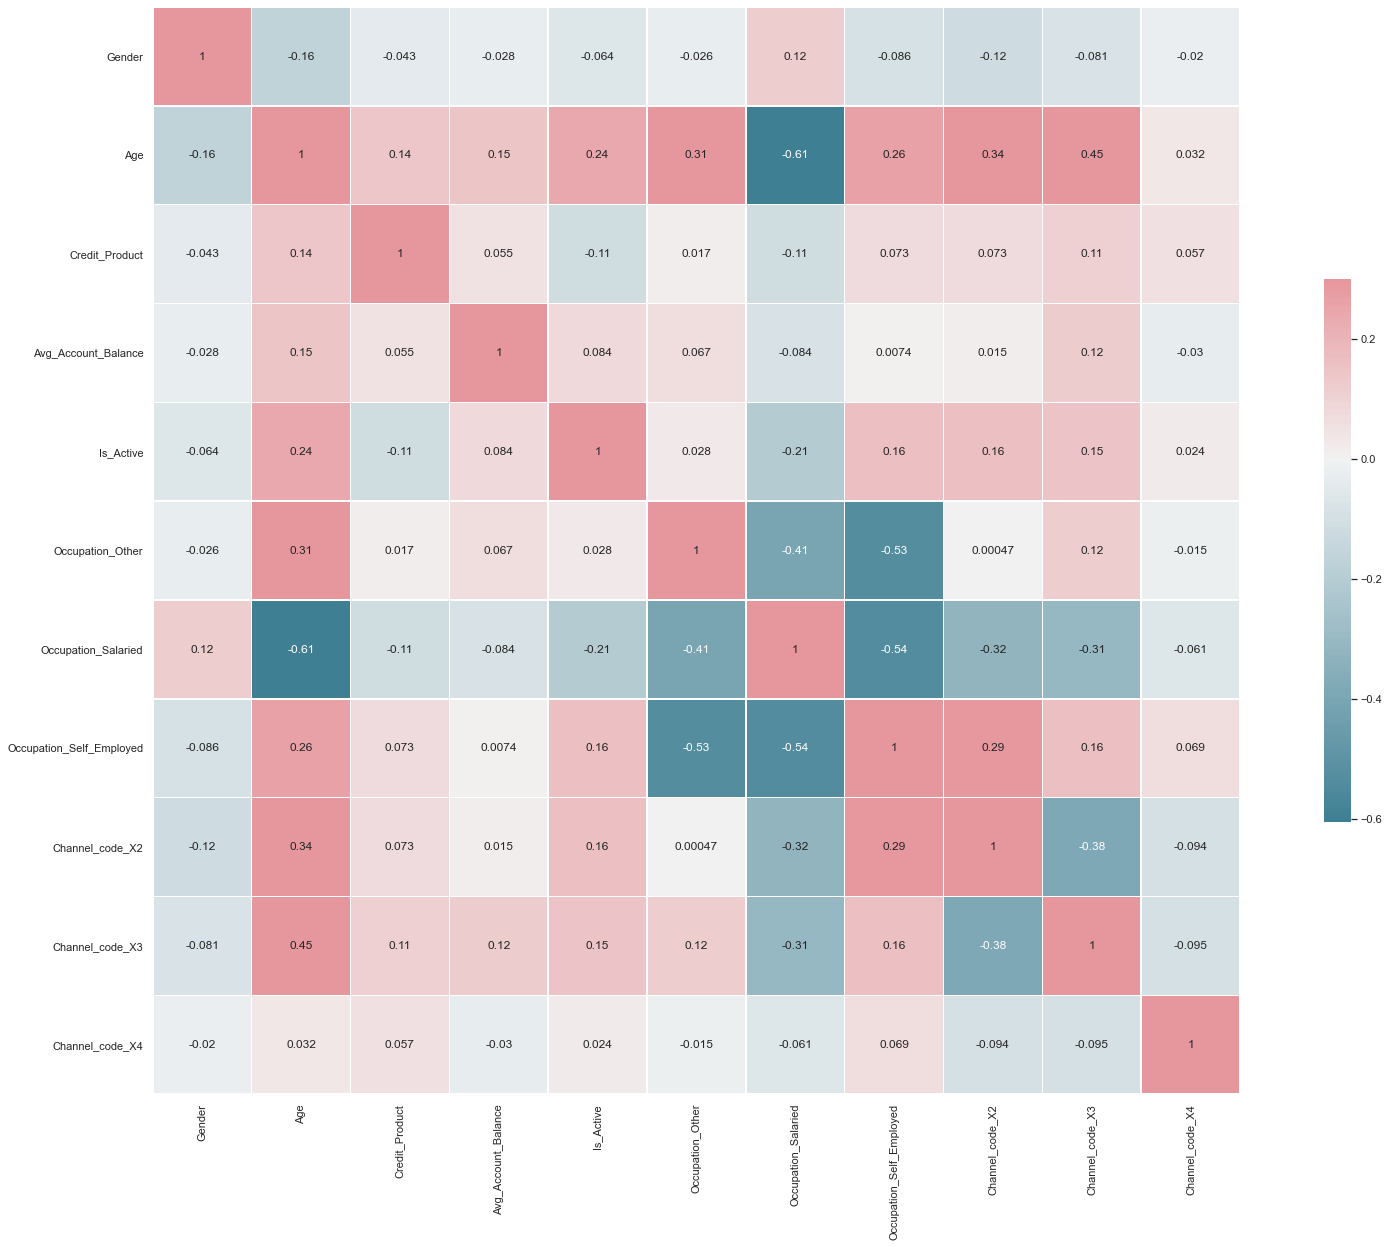

In [45]:
#print('Training Features shape: ', data.shape)
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train_data.corr(), cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [46]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# #sc = StandardScaler()
# #X_train = sc.fit_transform(X_train)
# #X_test = sc.fit_transform(X_test)
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.fit_transform(X_test)

# Modelling with Ensemble Techniques

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
#import sklearn.neighbors._base
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [48]:
#Decission Tree
dt = DecisionTreeClassifier()
clf_dt = dt.fit(X_train,y_train)
y_pred_dt=clf_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test,y_pred_dt)
print(accuracy_score(y_test,y_pred_dt))

0.7859415464298927


In [49]:
# Using a Random Forest classifier 
model_rf = RandomForestClassifier(n_estimators=100,random_state=0)
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test,y_pred_rf)
print("Training Accuracy: ", model_rf.score(X_train, y_train))
print('Testing Accuarcy: ', model_rf.score(X_test, y_test))

Training Accuracy:  0.7895647948492119
Testing Accuarcy:  0.7858922185226291


In [50]:
cl_report = classification_report(y_test,y_pred_rf)
print(cl_report)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88     61867
           1       0.73      0.15      0.25     19223

    accuracy                           0.79     81090
   macro avg       0.76      0.57      0.56     81090
weighted avg       0.78      0.79      0.73     81090



In [51]:
#A balanced random forest randomly under-samples each boostrap sample to balance it.
model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_balanced_clf = accuracy_score(y_test,y_pred)
print("Training Accuracy: ", model.score(X_train, y_train))
print('Testing Accuarcy: ', model.score(X_test, y_test))

Training Accuracy:  0.6507911440459198
Testing Accuarcy:  0.6445431002589715


In [52]:
cl_report = classification_report(y_test,y_pred)
print(cl_report)

              precision    recall  f1-score   support

           0       0.89      0.61      0.72     61867
           1       0.38      0.76      0.50     19223

    accuracy                           0.64     81090
   macro avg       0.63      0.69      0.61     81090
weighted avg       0.77      0.64      0.67     81090



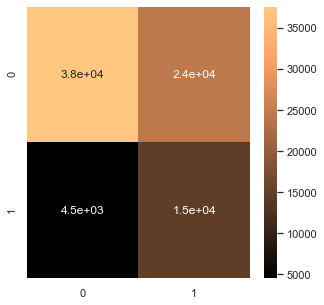

In [53]:
#Confusion Matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

In [54]:
#Logistic Regression
model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)
y_pred_logit = model_logit.predict(X_test)
accuracy_logit = accuracy_score(y_test,y_pred_logit)
print("Training Accuracy: ", model_logit.score(X_train, y_train))
print('Testing Accuarcy: ', model_logit.score(X_test, y_test))

Training Accuracy:  0.7826464603516871
Testing Accuarcy:  0.7824392650141818


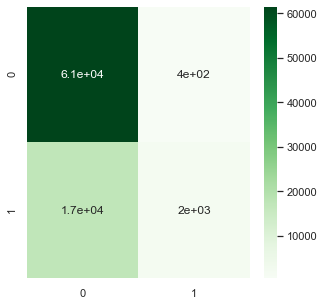

In [55]:
#Confusion Matrix Logistic Regression
plt.rcParams['figure.figsize'] = (5, 5)
cm_logit = confusion_matrix(y_test, y_pred_logit)
sns.heatmap(cm_logit, annot = True, cmap = 'Greens')
plt.show()

In [56]:
#KNN
knn = KNeighborsClassifier(n_neighbors=6)
clf_knn = knn.fit(X_train,y_train)
y_pred_knn = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print(accuracy_score(y_test,y_pred_knn))

0.7699593044765076


In [57]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf_nb= GaussianNB()
# sv = SVC()
clf_nb = clf_nb.fit(X_train,y_train)
y_pred_nb = clf_nb.predict(X_test)
print(accuracy_score(y_test,y_pred_nb))

0.6491059316808484


In [58]:
#Lets use k-fold cross validation
from sklearn.model_selection import KFold,cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

In [59]:
#Decission Tree
score= cross_val_score(dt,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(score)
print(round(np.mean(score),2))

[0.78595724 0.78407434 0.78364917 0.78607872 0.78802235 0.78497236
 0.78728057 0.78521533 0.78867764 0.78442568]
0.79


In [60]:
#Random Forest
score= cross_val_score(model_rf,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score),2))

0.79


In [61]:
#Support Vector
# score= cross_val_score(sv,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
# print(round(np.mean(score),2))

**Applying Sampling Technique**

**Up sampling with SMOTE**

In [62]:
from imblearn.over_sampling import SMOTE
x_resample, y_resample  = SMOTE().fit_resample(X, y.ravel())

print(x_resample.shape)
print(y_resample.shape)

(374874, 11)
(374874,)


In [63]:
from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

print(x_train2.shape)
print(y_train2.shape)
print(x_test2.shape)
print(y_test2.shape)

(299899, 11)
(299899,)
(74975, 11)
(74975,)


In [64]:
# standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train2 = sc.fit_transform(x_train2)
x_test2 = sc.transform(x_test2)

Training Accuracy:  0.693726888052311
Testing Accuarcy:  0.6887895965321774


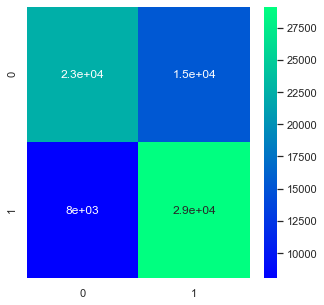

              precision    recall  f1-score   support

           0       0.74      0.60      0.66     37810
           1       0.66      0.78      0.71     37165

    accuracy                           0.69     74975
   macro avg       0.70      0.69      0.69     74975
weighted avg       0.70      0.69      0.69     74975



In [65]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_o = RandomForestClassifier()
model_o.fit(x_train2, y_train2)

y_pred = model_o.predict(x_test2)

print("Training Accuracy: ", model_o.score(x_train2, y_train2))
print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

# confusion matrix
cm = confusion_matrix(y_test2, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.show()
# classification report
cr = classification_report(y_test2, y_pred)
print(cr)

# XGBoost Classifier

In [66]:
xgb = XGBClassifier(n_estimators=100)

In [67]:
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
print("Training Accuracy: ", xgb.score(X_train, y_train))
print('Testing Accuarcy: ', xgb.score(X_test, y_test))
print(accuracy_xgb)

Training Accuracy:  0.7858839250463145
Testing Accuarcy:  0.785707238870391
0.785707238870391


In [68]:
#Xg Boost
score= cross_val_score(xgb,X_train,y_train,cv=k_fold,n_jobs=1,scoring='accuracy')
print(round(np.mean(score),2))

0.79


In [69]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [70]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [71]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [72]:
classifier=xgboost.XGBClassifier()

In [73]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [74]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits

 Time taken: 0 hours 3 minutes and 2.44 seconds.


In [75]:
random_search.best_estimator_

XGBClassifier(colsample_bytree=0.7, gamma=0.4, max_depth=6)

In [76]:
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [84]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.7, gamma=0.4, learning_rate=0.2,
       max_delta_step=0, max_depth=6, min_child_weight=5, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [85]:
classifier.fit(X_train,y_train)
y_pred_xgb = classifier.predict(X_test)
accuracy_xgb = accuracy_score(y_test,y_pred_xgb)
print("Training Accuracy: ", classifier.score(X_train, y_train))
print('Testing Accuarcy: ', classifier.score(X_test, y_test))
print(accuracy_xgb)

Training Accuracy:  0.7887326510158836
Testing Accuarcy:  0.787174744111481
0.787174744111481


# Feature scaling

In [79]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# #sc = StandardScaler()
# #X_train = sc.fit_transform(X_train)
# #X_test = sc.fit_transform(X_test)
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.fit_transform(X_test)

In [80]:
# X_train.shape

(164635, 11)

# ANN Model Building

In [81]:
# #Keras library
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# #Initialise ANN
# classifier_ann = Sequential()
# #1st hidden layer
# classifier_ann.add(Dense(activation='relu',output_dim=6,init='uniform'))
# #2nd hidden layer
# classifier_ann.add(Dense(activation='relu',output_dim=5,init='uniform'))
# #output layer
# classifier_ann.add(Dense(activation='sigmoid',output_dim=1,init='uniform'))
# #compile 
# classifier_ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# #Fit the model
# classifier_ann.fit(X_train,y_train,batch_size=100,epochs=50)

Using TensorFlow backend.
W0530 12:53:09.622023 131356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0530 12:53:09.665996 131356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0530 12:53:09.704971 131356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0530 12:53:09.708969 131356 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0530 12:53:09.784921 131356 deprecation_wrapper.p

Epoch 1/50
164635/164635 [==============================] - 3s 19us/step - loss: 0.5204 - acc: 0.7627
Epoch 2/50
164635/164635 [==============================] - 3s 17us/step - loss: 0.4815 - acc: 0.7692
Epoch 3/50
164635/164635 [==============================] - 3s 16us/step - loss: 0.4745 - acc: 0.7838
Epoch 4/50
164635/164635 [==============================] - 3s 17us/step - loss: 0.4678 - acc: 0.7845
Epoch 5/50
164635/164635 [==============================] - 3s 17us/step - loss: 0.4651 - acc: 0.7845
Epoch 6/50
164635/164635 [==============================] - 3s 17us/step - loss: 0.4638 - acc: 0.7847
Epoch 7/50
164635/164635 [==============================] - 3s 16us/step - loss: 0.4629 - acc: 0.7849
Epoch 8/50
164635/164635 [==============================] - 3s 17us/step - loss: 0.4621 - acc: 0.7854
Epoch 9/50
164635/164635 [==============================] - 3s 17us/step - loss: 0.4614 - acc: 0.7857
Epoch 10/50
164635/164635 [==============================] - 3s 18us/step - loss: 

In [94]:
ids = test['ID']
predictions = model_rf.predict(test.drop('ID', axis=1))

# Final Model  "Random Forest" and "XGboost" gives better result

In [95]:
output = pd.DataFrame({ 'ID' : ids, 'Is_Lead': predictions })
output.to_csv('predictions_rf.csv', index = False)
output.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
